In [466]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import pickle
from datetime import datetime

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

In [467]:
data = pd.read_csv('clean_ml_data.csv')

In [468]:
data.head()

,type,calories burned,climb (m),duration(s),distance(m),speed(m/s),calories burned per second,day_of_week,month
0,Running,774.0,130,3520.0,10440.0,2.966667,0.219886,Sunday,November
1,Running,954.0,168,4454.0,12840.0,2.886111,0.214189,Friday,November
2,Running,967.0,171,4515.0,13010.0,2.880556,0.214175,Sunday,November
3,Running,960.0,169,4454.0,12980.0,2.908333,0.215537,Thursday,November
4,Running,967.0,170,4332.0,13020.0,2.980556,0.223223,Saturday,October


In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   type                        426 non-null    object 
 1   calories burned             426 non-null    float64
 2   climb (m)                   426 non-null    int64  
 3   duration(s)                 426 non-null    float64
 4   distance(m)                 426 non-null    float64
 5   speed(m/s)                  426 non-null    float64
 6   calories burned per second  426 non-null    float64
 7   day_of_week                 426 non-null    object 
 8   month                       426 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 30.1+ KB


### remove infered columns

In [470]:
data = data.drop(['calories burned per second', 'speed(m/s)'], axis=1)

In [471]:
data.head()

,type,calories burned,climb (m),duration(s),distance(m),day_of_week,month
0,Running,774.0,130,3520.0,10440.0,Sunday,November
1,Running,954.0,168,4454.0,12840.0,Friday,November
2,Running,967.0,171,4515.0,13010.0,Sunday,November
3,Running,960.0,169,4454.0,12980.0,Thursday,November
4,Running,967.0,170,4332.0,13020.0,Saturday,October


### encoding the categorical variables

In [472]:
type_categories = data[['type']]
type_encoder = OneHotEncoder()
one_hot_encoded = type_encoder.fit_transform(type_categories).toarray()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=type_encoder.get_feature_names_out(['type']))
data = pd.concat([data, one_hot_df], axis=1)
data.head()

,type,calories burned,climb (m),duration(s),distance(m),day_of_week,month,type_Cycling,type_Running
0,Running,774.0,130,3520.0,10440.0,Sunday,November,0.0,1.0
1,Running,954.0,168,4454.0,12840.0,Friday,November,0.0,1.0
2,Running,967.0,171,4515.0,13010.0,Sunday,November,0.0,1.0
3,Running,960.0,169,4454.0,12980.0,Thursday,November,0.0,1.0
4,Running,967.0,170,4332.0,13020.0,Saturday,October,0.0,1.0


In [473]:
month_categories = data[['month']]
month_encoder = OneHotEncoder()
one_hot_encoded = month_encoder.fit_transform(month_categories).toarray()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=month_encoder.get_feature_names_out(['month']))
data = pd.concat([data, one_hot_df], axis=1)
data.head()

,type,calories burned,climb (m),duration(s),distance(m),day_of_week,month,type_Cycling,type_Running,month_April,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Running,774.0,130,3520.0,10440.0,Sunday,November,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Running,954.0,168,4454.0,12840.0,Friday,November,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Running,967.0,171,4515.0,13010.0,Sunday,November,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Running,960.0,169,4454.0,12980.0,Thursday,November,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Running,967.0,170,4332.0,13020.0,Saturday,October,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [474]:
day_of_week_categories = data[['day_of_week']]
day_of_week_encoder = OneHotEncoder()
one_hot_encoded = day_of_week_encoder.fit_transform(day_of_week_categories).toarray()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=day_of_week_encoder.get_feature_names_out(['day_of_week']))
data = pd.concat([data, one_hot_df], axis=1)
data.head()

,type,calories burned,climb (m),duration(s),distance(m),day_of_week,month,type_Cycling,type_Running,month_April,...,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,Running,774.0,130,3520.0,10440.0,Sunday,November,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Running,954.0,168,4454.0,12840.0,Friday,November,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Running,967.0,171,4515.0,13010.0,Sunday,November,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Running,960.0,169,4454.0,12980.0,Thursday,November,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Running,967.0,170,4332.0,13020.0,Saturday,October,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# baseline model

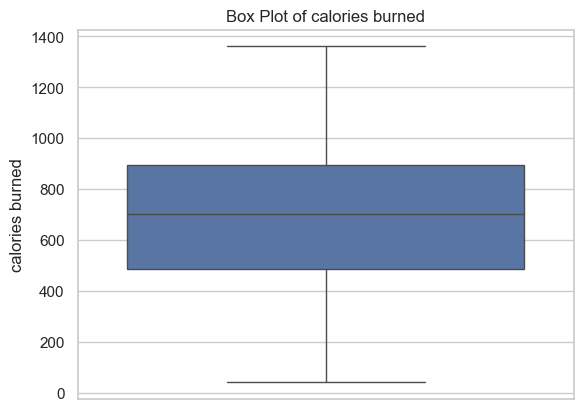

In [475]:
# Create a box plot using Seaborn
sns.boxplot(data=data['calories burned'])

# Add labels and title

plt.ylabel('calories burned')
plt.title('Box Plot of calories burned')

# Show the plot
plt.show()

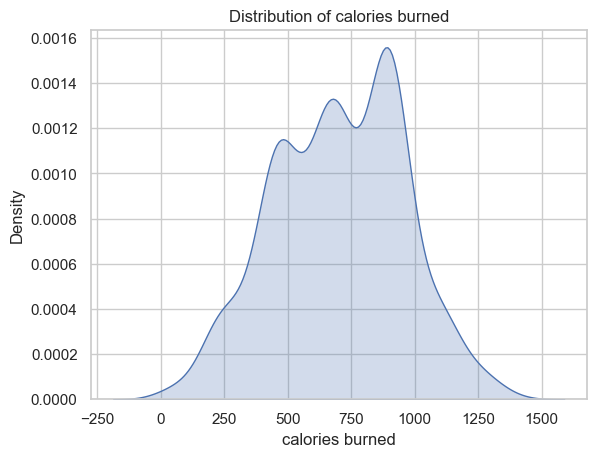

In [476]:

# Create a density plot using Seaborn
sns.kdeplot(data=data, x='calories burned', fill=True)

# Add labels and title
plt.xlabel('calories burned')
plt.ylabel('Density')
plt.title('Distribution of calories burned')

# Show the plot
plt.show();

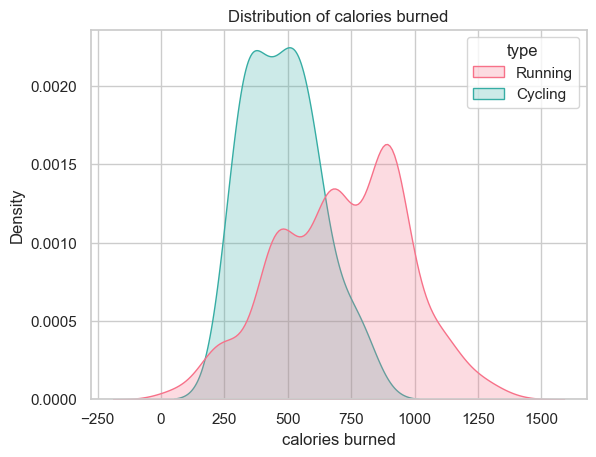

In [477]:

# Create a density plot with hue
sns.kdeplot(data=data, x='calories burned', hue='type', common_norm=False, fill=True, palette='husl')

# Add labels and title
plt.ylabel('Density')
plt.title('Distribution of calories burned')

# Show the plot
plt.show()

In [478]:
running_median = data['calories burned'][data['type']=='Running'].median()
cycling_mean = data['calories burned'][data['type']=='Cycling'].mean()
def baseline_model(type):
    if type.lower()=='running':
        return running_median
    elif type.lower()=='cycling':
        return cycling_mean
    else:
        raise Exception(f'This model is developed to work on running and cycling types of exercises but not {type}')

print(baseline_model('running'), baseline_model('cycling'))

707.999999795808 480.22727272727275


### evaluating the baseline model

In [479]:
df = data[['type', 'calories burned']]
df['calories burned baseline'] = df['type'].apply(baseline_model)
df.head()

/var/folders/6m/z1tx80z53q1gcyb0sbkh1b6h0000gq/T/ipykernel_40215/3657660032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['calories burned baseline'] = df['type'].apply(baseline_model)


,type,calories burned,calories burned baseline
0,Running,774.0,708.0
1,Running,954.0,708.0
2,Running,967.0,708.0
3,Running,960.0,708.0
4,Running,967.0,708.0


In [480]:
mae = mean_absolute_error(df['calories burned'], df['calories burned baseline'])
rmse = np.sqrt(mean_squared_error(df['calories burned'], df['calories burned baseline']))
r2 = r2_score(df['calories burned'], df['calories burned baseline'])
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (MSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 203.05
Root Mean Squared Error (MSE): 248.50
R-squared (R2): 0.04


## train test split

In [481]:
data = data.drop(['day_of_week', 'month', 'type'], axis=1)

In [482]:
y = data['calories burned']
X = data.drop('calories burned', axis=1)

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [484]:
RMSE = []
R2 = []
MAE = []
MODELS = []
MODEL_NAMES = []
# Creating a Function to append the cross validation scores of the algorithms
def compute_scores(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    MODEL_NAMES.append(name)
    MODELS.append(model)
    RMSE.append(np.sqrt(mean_squared_error(y_test, preds)))
    R2.append(r2_score(y_test, preds))
    MAE.append(mean_absolute_error(y_test, preds))

In [485]:
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]


In [486]:
#Running all algorithms
for name, model in zip(names, models):
    compute_scores(name, model, X_train, X_test, y_train, y_test)

In [487]:
evaluation = pd.DataFrame({'Model': MODEL_NAMES,
                           'RMSE': RMSE,
                           'R Squared': R2,
                           'Mean Absolute Error': MAE
                          })
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation.sort_values(by='Mean Absolute Error', ascending=True, inplace=True)


FOLLOWING ARE THE TRAINING SCORES: 


In [488]:
styled_df = evaluation.style \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center')]
    }])

# Display the styled DataFrame in Jupyter Notebook
styled_df

,Model,RMSE,R Squared,Mean Absolute Error
5,Random Forest Regressor,27.937410,0.989318,16.654900
3,K Neighbors Regressor,25.666593,0.990984,17.846892
6,Gradient Boosting Regressor,31.762259,0.986193,19.563212
4,Decision Tree Regressor,36.452132,0.981815,20.595078
0,Linear Regression,41.406240,0.976536,26.475038
1,Ridge Regression,40.712476,0.977316,26.655270
2,Lasso Regression,42.522057,0.975255,29.433680
7,Adaboost Regressor,50.867035,0.964589,36.784957


In [489]:
best_model = MODELS[-3]

## a prediction

In [490]:
best_model.predict(X_test.tail(1))

array([1268.80999984])

In [491]:
y_test.tail(1)+25

17    1286.0
Name: calories burned, dtype: float64

In [492]:
with open(f'../api/ml_models/random_forest_regressor{datetime.now()}.pkl', "wb") as file:
    pickle.dump(best_model, file)

### prediction data

In [495]:
X_test.tail(1).columns

Index(['climb (m)', 'duration(s)', 'distance(m)', 'type_Cycling',
       'type_Running', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')